# 결정 트리(Decision Tree)

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, stratify=iris.target, test_size=0.2, random_state=2021
)

In [3]:
dtc = DecisionTreeClassifier(random_state=2021)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2021, splitter='best')

### 모델 시각화

In [4]:
from sklearn.tree import export_graphviz
export_graphviz(
    dtc, out_file='tree.dot',
    class_names=iris.target_names, feature_names=iris.feature_names,
    impurity=True, filled=True
)

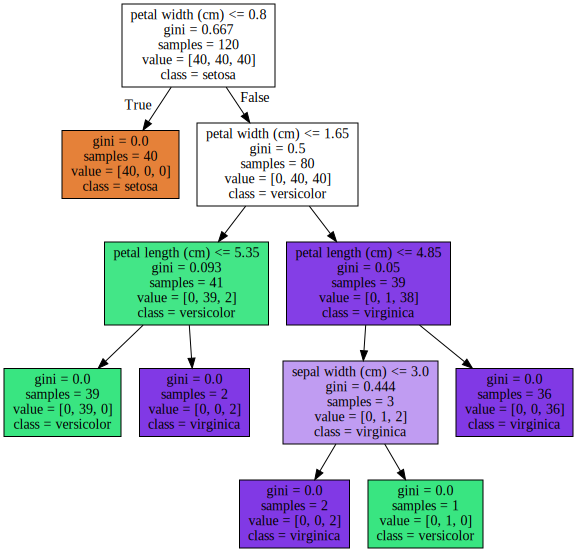

In [6]:
import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

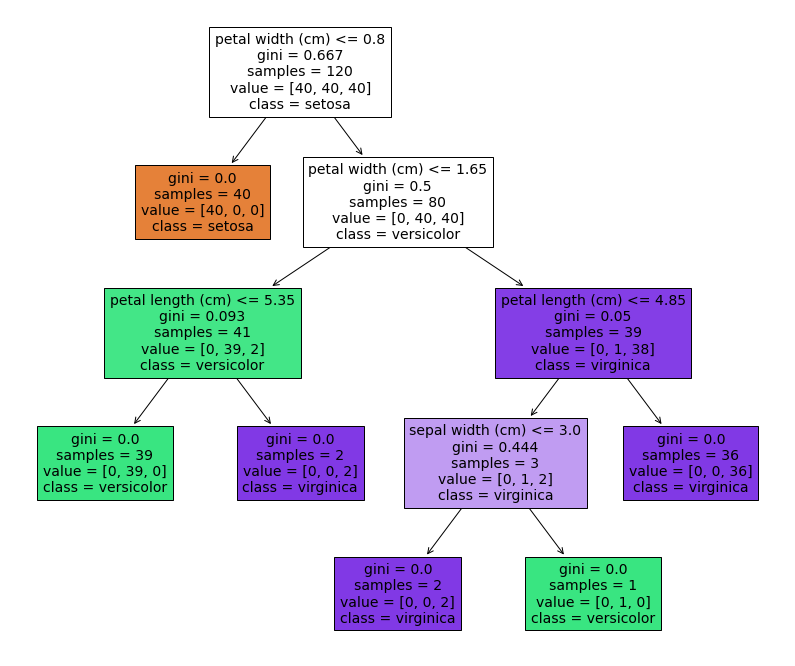

In [8]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(14,12))
plot_tree(dtc, filled=True, class_names=iris.target_names,
          feature_names=iris.feature_names)
plt.show()

### 제약조건
- max_depth = 3 인 경우

In [9]:
dtc2 = DecisionTreeClassifier(max_depth=3, random_state=2021)
dtc2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2021, splitter='best')

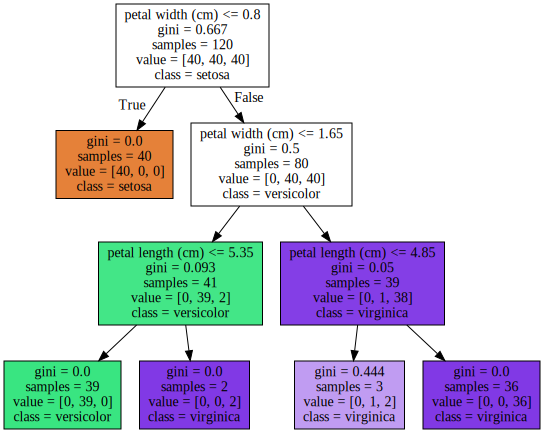

In [10]:
export_graphviz(
    dtc2, out_file='tree2.dot',
    class_names=iris.target_names, feature_names=iris.feature_names,
    impurity=True, filled=True
)
with open('tree2.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### 제약조건 유무에 따른 비교

In [11]:
dtc.score(X_test, y_test)

0.9

In [12]:
dtc2.score(X_test, y_test)

0.9

### 결정 트리가 제공하는 정보
- Feature Importance

In [13]:
dtc.feature_importances_

array([0.        , 0.01666667, 0.05525328, 0.92808005])

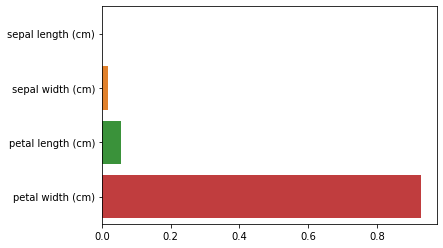

In [14]:
import seaborn as sns
sns.barplot(x=dtc.feature_importances_, y=iris.feature_names);